# Cargar dirección de las fotos

In [1]:
import numpy as np
from PIL import Image
import pylab
Im_traing= ["-005E-10","-020E-10","-070E+45","+000E+00","+005E-10","+020E-10","+070E+45"]
Im_test=["-110E+65","+110E+65"]
Traing=[]
Traing_y=[]
for x in range(28):
    for s in Im_traing:
        sujeto=11+x
        if(sujeto==14):
            continue
        img_d="/home/marco/Base_Patrones/CroppedYale/"+"yaleB"+str(sujeto)+"/yaleB"+str(sujeto)+"_P00A"+s+".pgm"
        Traing.append(img_d)
        Traing_y.append(sujeto)
Test=[]
Test_y=[]
for x in range(28):
    for s in Im_test:
        sujeto=11+x
        if(sujeto==14):
            continue
        img_d="/home/marco/Base_Patrones/CroppedYale/"+"yaleB"+str(sujeto)+"/yaleB"+str(sujeto)+"_P00A"+s+".pgm"
        Test.append(img_d)
        Test_y.append(sujeto)
print(len(Traing))
print(len(Test))

189
54


# Cargar las Imágenes

In [2]:
im = np.array(Image.open(Traing[0]))
m,n = im.shape[0:2]
imnbr = len(Traing)
Traing_matrix = np.array([np.array(Image.open(Traing[i])).flatten() for i in range(imnbr)])
imnbr = len(Test)
Test_matrix = np.array([np.array(Image.open(Test[i])).flatten() for i in range(imnbr)])

## Ver alguna muestra de las imágenes

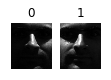

In [88]:
from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator
i=1
for x in range(2):
    ax = subplot(1,7,i,frame_on=False)
    ax.xaxis.set_major_locator(NullLocator()) 
    ax.yaxis.set_major_locator(NullLocator())
    imshow(Test_matrix[x].reshape(m,n))
    title(str(x))
    gray()
    i=i+1
pylab.show()

# KNN con todos los pixeles

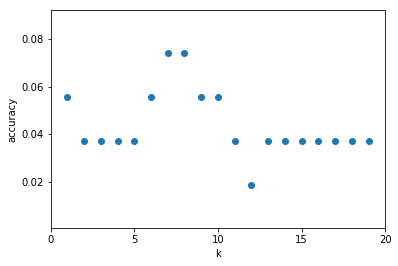

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Traing_matrix, np.array(Traing_y))
    scores.append(knn.score(Test_matrix, np.array(Test_y)))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [4]:

n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(Traing_matrix, np.array(Traing_y))

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(Traing_matrix, np.array(Traing_y))))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(Test_matrix, np.array(Test_y))))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.07


In [5]:
pred = knn.predict(Test_matrix)
#print(confusion_matrix(np.array(Test_y), pred))
print(classification_report(np.array(Test_y), pred))


             precision    recall  f1-score   support

         11       0.00      0.00      0.00         2
         12       0.00      0.00      0.00         2
         13       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         2
         17       0.00      0.00      0.00         2
         18       0.00      0.00      0.00         2
         19       0.00      0.00      0.00         2
         20       0.00      0.00      0.00         2
         21       0.00      0.00      0.00         2
         22       0.11      0.50      0.18         2
         23       0.00      0.00      0.00         2
         24       0.00      0.00      0.00         2
         25       0.00      0.00      0.00         2
         26       0.00      0.00      0.00         2
         27       0.20      1.00      0.33         2
         28       0.00      0.00      0.00         2
         29       0.00      0.00      0.00   

/home/marco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Función myPCA

In [3]:
from numpy import mean,cov,cumsum,dot,linalg,size,flipud

def myPCA(M,k):
    means=mean(M.T,axis=1) #Calcular Imagen Promedio 
    M=(M-means).T  # Restar el promedio
    [latent,coeff] = linalg.eig(cov(M))
    p = size(coeff,axis=1) #Valor max para k
    idx = argsort(latent) # ordenando los valores propios
    idx = idx[::-1]       
    # ordenar los vectores propios de acuerdo con los valores propios ordenados
    coeff = coeff[:,idx]
    latent = latent[idx] # ordenando los valores propios
    if k < p and k >= 0:
        coeff = coeff[:,range(k)] # Corto a solo los vectores solicitados
    return coeff, means 

# 10 primeros vectores propios y imagen promedio

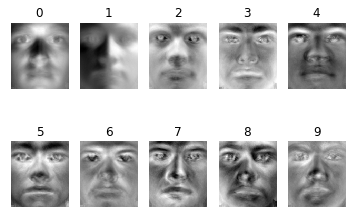

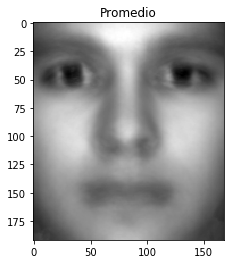

In [7]:
V , M = myPCA(Traing_matrix,10)

from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator
i=1
for x in range(10):
    ax = subplot(2,5,i,frame_on=False)
    ax.xaxis.set_major_locator(NullLocator()) 
    ax.yaxis.set_major_locator(NullLocator())
    imshow(V[x].reshape(m,n))
    title(str(x))
    gray()
    i=i+1
figure()
imshow(M.reshape(m,n))
title('Promedio')
gray()
pylab.show()

# Función getProjection

In [8]:
from numpy import mean,cov,cumsum,dot,linalg,size,flipud
def getProjection(I,V,means,k):
    Center= (I-means)
    proyection = dot(V[range(k)],Center)
    return proyection
    

## Reconstrucción de Fotos

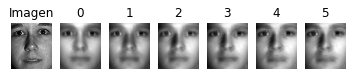

In [9]:
i=1
ax = subplot(1,7,i,frame_on=False)
ax.xaxis.set_major_locator(NullLocator()) 
ax.yaxis.set_major_locator(NullLocator())
imshow(Traing_matrix[155].reshape(m,n))
title("Imagen")
gray()

for x in range(6):
    i=i+1
    V , M = myPCA(Traing_matrix,x)
    proye = getProjection(Traing_matrix[155],V,M,x)
    Ar = dot(V.T,proye)+M
    
    ax = subplot(1,7,i,frame_on=False)
    ax.xaxis.set_major_locator(NullLocator()) 
    ax.yaxis.set_major_locator(NullLocator())
    
    imshow(Ar.reshape(m,n))
    title(str(x))
    gray()
pylab.show() 

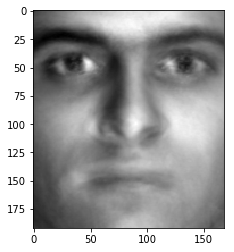

In [49]:
Ar = dot(V.T,resp)+mean

im = Ar.reshape(m,n)
pylab.figure()
pylab.gray()
pylab.imshow(im)
pylab.show()

In [50]:
k=15
XN_train=np.matrix(np.empty(shape=((0,k))))
XN_test = np.matrix(np.empty(shape=((0,k))))
x=0
for im in Traing_matrix:
    V, mean = myPCA(Traing_matrix,k)
    proyection = getProjection(im,V,mean,k)
    XN_train= np.insert(XN_train,x,proyection,axis=0)
    x=x+1

x=0
for im in Test_matrix:
    V, mean = myPCA(Traing_matrix,k)
    proyection = getProjection(im,V,mean,k)
    XN_test= np.insert(XN_test,x,proyection,axis=0)
    x=x+1

In [21]:
print(XN_train.shape,Traing_matrix.shape,len(Traing_y))
print(XN_test.shape,Test_matrix.shape,len(Test_y))

(189, 8) (189, 32256) 189
(54, 8) (54, 32256) 54


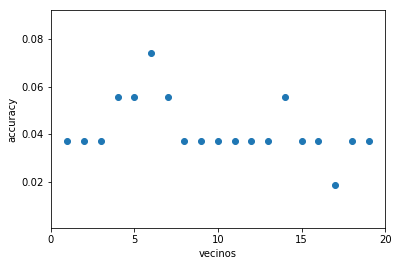

In [51]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(XN_train, np.array(Traing_y))
    scores.append(knn.score(XN_test, np.array(Test_y)))
plt.figure()
plt.xlabel('vecinos')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(XN_train, np.array(Traing_y))

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(XN_train, np.array(Traing_y))))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(XN_test, np.array(Test_y))))

Accuracy of K-NN classifier on training set: 0.69
Accuracy of K-NN classifier on test set: 0.06


In [53]:
pred = knn.predict(XN_test)
#print(confusion_matrix(np.array(Test_y), pred))
print(classification_report(np.array(Test_y), pred))


             precision    recall  f1-score   support

         11       0.00      0.00      0.00         2
         12       0.00      0.00      0.00         2
         13       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         2
         17       0.00      0.00      0.00         2
         18       0.00      0.00      0.00         2
         19       0.00      0.00      0.00         2
         20       0.00      0.00      0.00         2
         21       0.00      0.00      0.00         2
         22       0.05      0.50      0.10         2
         23       0.00      0.00      0.00         2
         24       0.00      0.00      0.00         2
         25       0.00      0.00      0.00         2
         26       0.00      0.00      0.00         2
         27       0.10      0.50      0.17         2
         28       0.00      0.00      0.00         2
         29       0.00      0.00      0.00   

/home/marco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
